# 실험데이터(3DP) 불러와서 그래프 그리기

### 라이브러리 불러오기

In [137]:
import pandas            as pd
import numpy             as np
import matplotlib        as mpl
import matplotlib.pyplot as plt

### 데이터 불러오기 (pd.read_csv)

In [139]:
rawData = pd.read_csv('./Data/Example_data_3DP_Full.txt', sep='\t', names=['time', 'ACCx', 'ACCy', 'ACCz', 'AE'])

print(rawData.shape)
print(rawData.info())
rawData.head(5)


(1733000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733000 entries, 0 to 1732999
Data columns (total 5 columns):
time    float64
ACCx    float64
ACCy    float64
ACCz    float64
AE      float64
dtypes: float64(5)
memory usage: 66.1 MB
None


,time,ACCx,ACCy,ACCz,AE
0,0.000000,0.000318,0.000190,0.000328,0.000691
1,0.000156,0.000386,0.000106,0.000283,0.000250
2,0.000312,0.000341,0.000143,0.000296,0.000862
3,0.000469,0.000257,0.000325,0.000257,-0.000276
4,0.000625,0.000278,0.000276,0.000305,0.000270


### time열 제거하기

In [118]:
signalData = rawData.iloc[:,1:5]
signalData

,ACCx,ACCy,ACCz,AE
0,0.000318,0.000190,0.000328,0.000691
1,0.000386,0.000106,0.000283,0.000250
2,0.000341,0.000143,0.000296,0.000862
3,0.000257,0.000325,0.000257,-0.000276
4,0.000278,0.000276,0.000305,0.000270
5,0.000395,0.000201,0.000259,0.000065
6,0.000380,0.000267,0.000263,0.000425
7,0.000444,0.000323,0.000310,-0.000003
8,0.000427,0.000366,0.000311,0.000525
9,0.000401,0.000438,0.000261,-0.000701


### Subplot 그래프 그리기

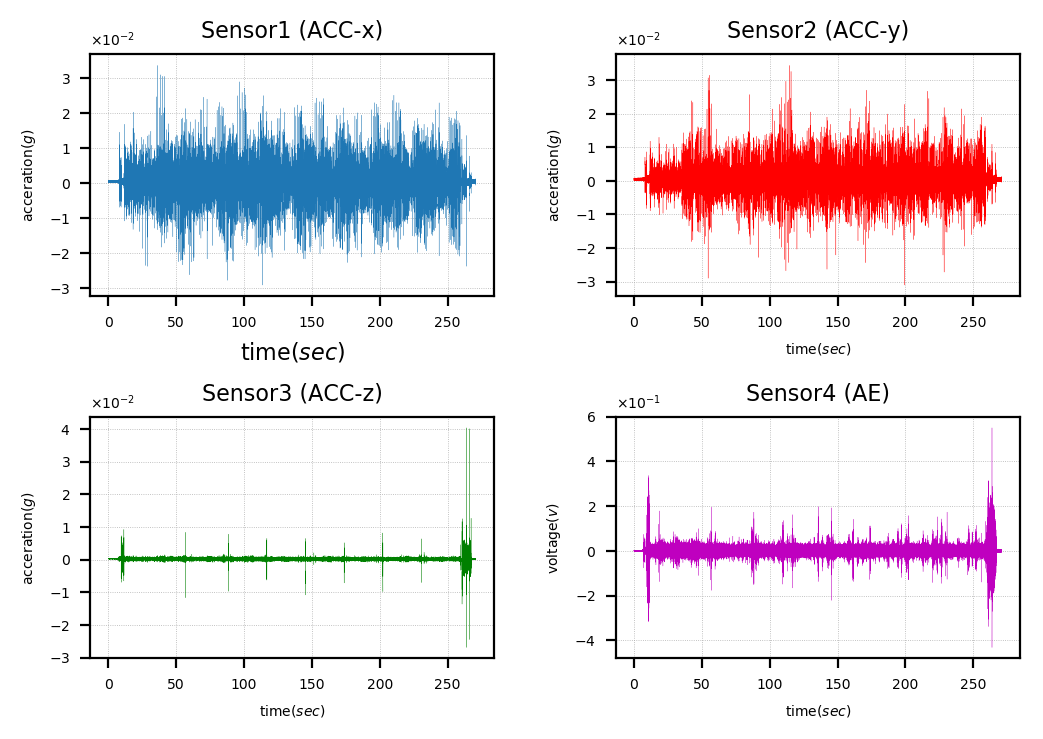

In [135]:

mpl.rcParams.update({'font.size': 5, 'grid.linestyle': ':', 'grid.linewidth': 0.3})

ticksfontsize = 5
titlefont = {'size': 8}
labelfont = {'size': 5}

plt.figure(num=2, dpi=200)
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

plt.subplot(2,2,1)
plt.plot(rawData.time, rawData.ACCx, linewidth = 0.1)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.xticks(size = ticksfontsize)
plt.yticks(size = ticksfontsize)
plt.title('Sensor1 (ACC-x)',  fontdict=titlefont) # "fontsize=8"로 써도 무방
plt.xlabel('time($sec$)',     fontdict=font1)     # "fontsize=5"로 써도 무방
plt.ylabel('acceration($g$)', fontdict=font1)
plt.grid()

plt.subplot(2,2,2)
plt.plot(rawData.time, rawData.ACCy, 'r', linewidth = 0.1)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.xticks(size = ticksfontsize)
plt.yticks(size = ticksfontsize)
plt.title('Sensor2 (ACC-y)',  fontdict=titlefont)
plt.xlabel('time($sec$)',     fontdict=labelfont)
plt.ylabel('acceration($g$)', fontdict=labelfont)
plt.grid()

plt.subplot(2,2,3)
plt.plot(rawData.time, rawData.ACCz, 'g', linewidth = 0.1)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.xticks(size = ticksfontsize)
plt.yticks(size = ticksfontsize)
plt.title('Sensor3 (ACC-z)',  fontdict=titlefont)
plt.xlabel('time($sec$)',     fontdict=labelfont)
plt.ylabel('acceration($g$)', fontdict=labelfont)
plt.grid()

plt.subplot(2,2,4)
plt.plot(rawData.time, rawData.AE, 'm', linewidth = 0.1)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)
plt.xticks(size = ticksfontsize)
plt.yticks(size = ticksfontsize)
plt.title('Sensor4 (AE)',  fontdict=titlefont)
plt.xlabel('time($sec$)',  fontdict=labelfont)
plt.ylabel('voltage($v$)', fontdict=labelfont)
plt.grid()

plt.show()